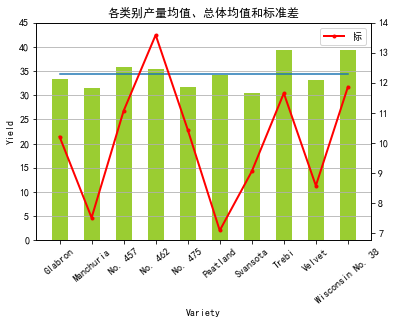

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = pd.read_csv('./barley2.csv')
# 设置中文显示
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False

# 取出试验点名、种类名
sites = data.Site.unique()
varieties = data.Variety.unique()

# 计算各种类平均值、总体平均值、各种类标准差
# 种类平均值
varieties_mean = data.groupby('Variety')['Yield'].mean()
all_mean = data.Yield.mean()
varieties_standard_deviation = data.groupby('Variety')['Yield'].std()
# 绘图

fig,ax1 = plt.subplots()
# 均值
plt.plot(varieties, [all_mean for i in range(len(varieties))])
plt.title('各类别产量均值、总体均值和标准差')
# 种类均值
plt.bar(varieties, varieties_mean, facecolor='yellowgreen', width=0.5)
plt.grid(axis='y')
plt.xlabel('Variety')
plt.ylabel('Yield')
plt.xticks(rotation=40)
plt.yticks(range(0,50,5))

# 标准差
ax2 = ax1.twinx()
plt.plot(varieties, varieties_standard_deviation,'.-', lw=2, color='r')
plt.yticks(range(7,15))
plt.legend('标准差', loc = 'best')

plt.savefig('./整体分析.jpg')
plt.show()

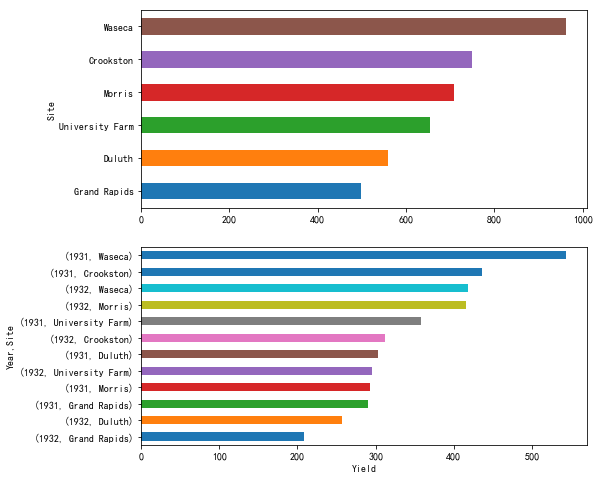

In [3]:
'''按地区分析'''
fig, axes = plt.subplots(2,1)

# 按地区绘制总产量
data.groupby(['Site'])['Yield'].sum().sort_values().plot(kind='barh', figsize=(8,4), ax=axes[0])
# 按地区、年份绘制总产量
data.groupby(['Year', 'Site'])['Yield'].sum().sort_values().plot(kind='barh', figsize=(8,8), ax=axes[1])
plt.xlabel('Yield')
plt.savefig('各实验站每年总产量.jpg')
plt.show()

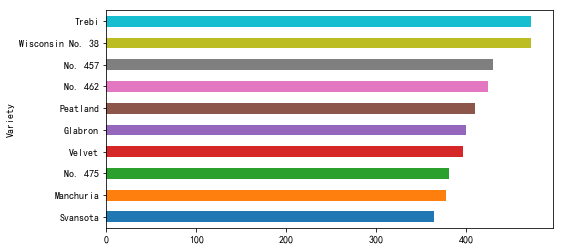

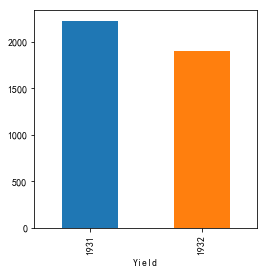

In [4]:
'''按大麦类别'''
# 不按年份分组
data.groupby('Variety')['Yield'].sum().sort_values().plot(kind='barh', figsize=(8,4))
plt.savefig('各种类大麦总产量.jpg')
plt.show()
# 按年份分组
data.groupby( 'Year')['Yield'].sum().plot(kind='bar', figsize=(4,4))
plt.xlabel('Yield')
plt.savefig('各年份总产量.jpg')
plt.show()

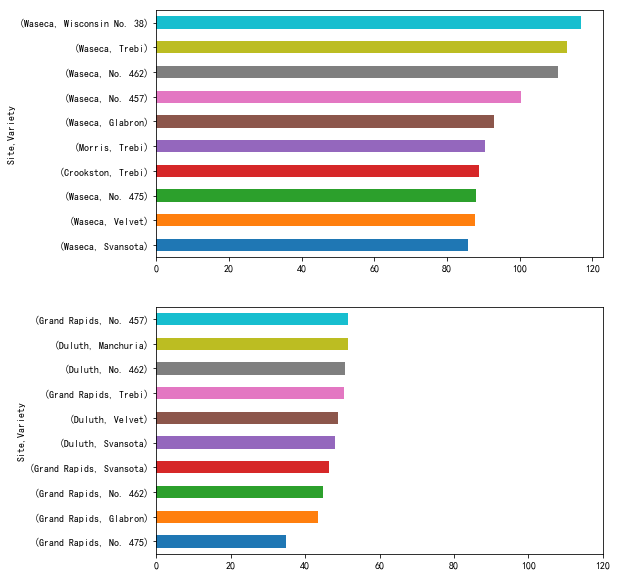

In [5]:
'''按地区和大麦种类'''
fig, axes = plt.subplots(2,1)
data.groupby(['Site','Variety'])['Yield'].sum().sort_values(ascending=False).head(10).sort_values().plot(kind='barh', figsize=(8,10), ax=axes[0])
data.groupby(['Site','Variety'])['Yield'].sum().sort_values().head(10).sort_values().plot(kind='barh', figsize=(8,10), ax=axes[1])
plt.xticks(range(0,121,20))
plt.savefig('产量最高的地区种类和产量最低的地区种类.jpg')
plt.show()

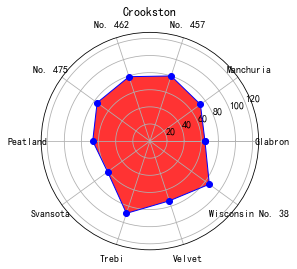

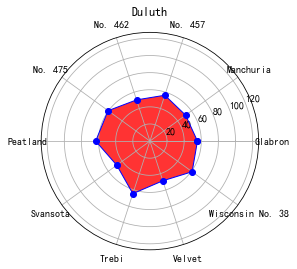

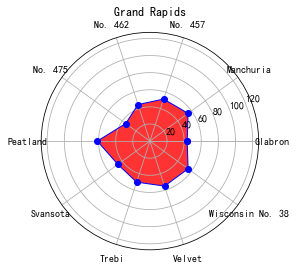

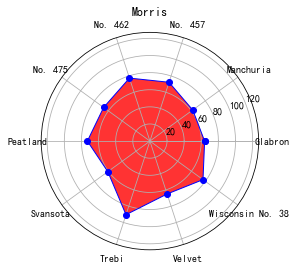

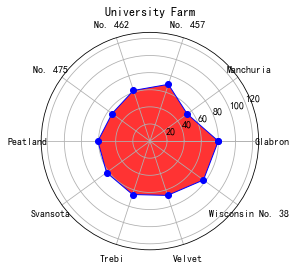

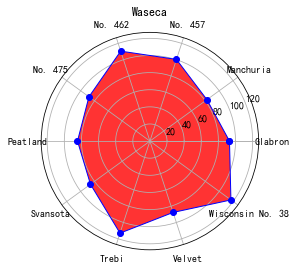

In [9]:
'''绘制各个地区关于每个大麦种类产量的雷达图'''
# 创建保存图片的目录
import os
path = os.path.abspath(os.curdir) + '\\radar'
if os.path.exists(path) == False:
    os.mkdir(path)

# 分组求和
data_series = data.groupby(['Site','Variety'])['Yield'].sum()

labels = np.array(varieties) # 标签
dataLenth = len(labels)  # 数据长度

# 雷达图绘制
def radar_chart(data, i):
    data_radar = np.array(data) # 数据
    angles = np.linspace(0, 2*np.pi, dataLenth, endpoint=False)  # 分割圆周长
    data_radar = np.concatenate((data_radar, [data_radar[0]]))  # 闭合
    angles = np.concatenate((angles, [angles[0]]))  # 闭合
    plt.polar(angles, data_radar, 'bo-', linewidth=1)  # 做极坐标系
    plt.fill(angles, data_radar, facecolor='r', alpha=0.8)# 填充
    plt.thetagrids(angles * 180/np.pi, labels)  # 做标签
    plt.ylim(0, 127)
    plt.title(sites[i])
    plt.savefig('./radar/'+sites[i]+'.jpg')
    plt.show()

# 遍历绘制六个地区
for i in range(len(sites)):
    radar_chart(data_series[i*10:(i+1)*10], i)

In [8]:
# 计算各地区产量的四分位数，划分级别
sort_data = data.groupby(['Site','Variety'])['Yield'].sum()

for i in range(len(sites)):
    site_data = sort_data[i*10:(i+1)*10].sort_values()
    upper_quarter = np.percentile(site_data, 75)
    lower_quarter = np.percentile(site_data, 25)
    print(site_data)
    print(upper_quarter, lower_quarter)
    print('='*40)

Site       Variety         
Crookston  Svansota            61.10000
           Glabron             64.30000
           Peatland            66.83333
           Manchuria           72.90000
           Velvet              73.39999
           No. 475             76.23333
           No. 462             79.09999
           No. 457             80.00000
           Wisconsin No. 38    85.76667
           Trebi               88.76666
Name: Yield, dtype: float64
79.7749975 68.3499975
Site    Variety         
Duluth  Svansota            47.93333
        Velvet              48.76667
        No. 462             50.60000
        Manchuria           51.53334
        Glabron             55.53334
        No. 457             56.30000
        No. 475             60.43333
        Wisconsin No. 38    60.93333
        Peatland            63.36667
        Trebi               64.53333
Name: Yield, dtype: float64
60.80833 50.833335000000005
Site          Variety         
Grand Rapids  No. 475             34.933